In [1]:
import sys
from pycirclize import Circos

In [2]:
# !{sys.executable} -m pip install pycirclize
awk -F '\t' 'BEGIN{OFS="\t"} {$6=$10=$11="*"; print}'

SyntaxError: invalid syntax (2821020281.py, line 2)

In [3]:
! which python3

/usr/local/bin/python3


In [21]:
text = "##contig=<ID=chr1,length=248387328>, ##contig=<ID=chr2,length=242696752>,##contig=<ID=chr3,length=201105948>,##contig=<ID=chr4,length=193574945>,##contig=<ID=chr5,length=182045439>,##contig=<ID=chr6,length=172126628>,##contig=<ID=chr7,length=160567428>,##contig=<ID=chr8,length=146259331>,##contig=<ID=chr9,length=150617247>,##contig=<ID=chr10,length=134758134>,##contig=<ID=chr11,length=135127769>,##contig=<ID=chr12,length=133324548>,##contig=<ID=chr13,length=113566686>,##contig=<ID=chr14,length=101161492>,##contig=<ID=chr15,length=99753195>,##contig=<ID=chr16,length=96330374>,##contig=<ID=chr17,length=84276897>,##contig=<ID=chr18,length=80542538>,##contig=<ID=chr19,length=61707364>,##contig=<ID=chr20,length=66210255>,##contig=<ID=chr21,length=45090682>,##contig=<ID=chr22,length=51324926>,##contig=<ID=chrX,length=154259566>,##contig=<ID=chrM,length=16569>"

itemlist = text.split("##")
chrlist = {}
for item in itemlist:
    l = item.split(",")
    for i in l:
        if len(i) == 0:
            continue
        if "ID" in i:
            chromo = i.split("ID=")[1]
        if "length" in i:
            length = int(i.split("length=")[1][:-1])

        chrlist[chromo] = length
chrlist

{'chr1': 248387328,
 'chr2': 242696752,
 'chr3': 201105948,
 'chr4': 193574945,
 'chr5': 182045439,
 'chr6': 172126628,
 'chr7': 160567428,
 'chr8': 146259331,
 'chr9': 150617247,
 'chr10': 134758134,
 'chr11': 135127769,
 'chr12': 133324548,
 'chr13': 113566686,
 'chr14': 101161492,
 'chr15': 99753195,
 'chr16': 96330374,
 'chr17': 84276897,
 'chr18': 80542538,
 'chr19': 61707364,
 'chr20': 66210255,
 'chr21': 45090682,
 'chr22': 51324926,
 'chrX': 154259566,
 'chrM': 16569}

In [5]:
# multimapping
filename = "../../Bifrost_46samples_mitoccs_output/multimap.bam"
! samtools view ../../Bifrost_46samples_mitoccs_output/multimap.bam | awk -F '\t' 'BEGIN{OFS="\t"} {$6=$10=$11="*"; print}' > multimap.records.txt


In [6]:
def calculate_query_length_from_cigar(cigar):
    query_length = 0
    current_length = ""
    
    for char in cigar:
        if char.isdigit():
            # If the character is a digit, build the current length
            current_length += char
        elif char in "M=X":
            # If the character is 'M', 'X', or '=', add the current length to the query length
            query_length += int(current_length)
            current_length = ""  # Reset current length
        elif char == 'S':
            # If the character is 'S' (soft clip), add the current length to the query length
            query_length += int(current_length)
            current_length = ""  # Reset current length
    
    return query_length

In [22]:
with open("multimap.records.txt", 'r') as fp:
    data = fp.readlines()
    
Mappingfile = []
for records in data:
    itemlist = records.split('\t')
    chromosome = itemlist[2]
    pos = int(itemlist[3])
    for item in itemlist:
        
        if item.startswith("SA"):
            item = item[5:]
            l = item.split(';')
            for it in l:
                itlist = it.split(',')
                if len(itlist) <= 1:
                    continue
                #print(itlist)
                chromo = itlist[0]
                p = int(itlist[1])
                cigar = itlist[3]
                length = calculate_query_length_from_cigar(cigar)
                
                if chromo == "chrY":
                    continue
                if chromo == "chrM":
                    continue
                Mappingfile.append([(chromosome, pos, pos), (chromo, p, p)])

In [23]:
import pandas as pd
Mappingfile = pd.DataFrame(Mappingfile)
Mappingfile = Mappingfile.sort_values(by=1)
for index, row in Mappingfile.iterrows():
    print(row.values)

[('chrM', 3337, 3337) ('chr1', 27497, 27497)]
[('chrM', 3337, 3337) ('chr1', 29990, 29990)]
[('chrM', 3337, 3337) ('chr1', 31027, 31027)]
[('chrM', 3337, 3337) ('chr1', 31799, 31799)]
[('chrM', 3337, 3337) ('chr1', 32057, 32057)]
[('chrM', 3337, 3337) ('chr1', 32271, 32271)]
[('chrM', 3337, 3337) ('chr1', 33286, 33286)]
[('chrM', 3337, 3337) ('chr1', 33745, 33745)]
[('chrM', 3337, 3337) ('chr1', 35116, 35116)]
[('chrM', 3337, 3337) ('chr1', 35803, 35803)]
[('chrM', 3337, 3337) ('chr1', 36053, 36053)]
[('chrM', 3337, 3337) ('chr1', 36344, 36344)]
[('chrM', 3337, 3337) ('chr1', 36532, 36532)]
[('chrM', 3337, 3337) ('chr1', 36611, 36611)]
[('chrM', 3337, 3337) ('chr1', 36758, 36758)]
[('chrM', 3337, 3337) ('chr1', 37653, 37653)]
[('chrM', 3337, 3337) ('chr1', 39277, 39277)]
[('chrM', 3337, 3337) ('chr1', 41590, 41590)]
[('chrM', 3337, 3337) ('chr1', 42867, 42867)]
[('chrM', 3337, 3337) ('chr1', 44895, 44895)]
[('chrM', 3337, 3337) ('chr1', 45926, 45926)]
[('chrM', 3337, 3337) ('chr1', 465

In [24]:
sectors

{'chr1': 248387328,
 'chr2': 242696752,
 'chr3': 201105948,
 'chr4': 193574945,
 'chr5': 182045439,
 'chr6': 172126628,
 'chr7': 160567428,
 'chr8': 146259331,
 'chr9': 150617247,
 'chr10': 134758134,
 'chr11': 135127769,
 'chr12': 133324548,
 'chr13': 113566686,
 'chr14': 101161492,
 'chr15': 99753195,
 'chr16': 96330374,
 'chr17': 84276897,
 'chr18': 80542538,
 'chr19': 61707364,
 'chr20': 66210255,
 'chr21': 45090682,
 'chr22': 51324926,
 'chrX': 154259566,
 'chrM': 16569}

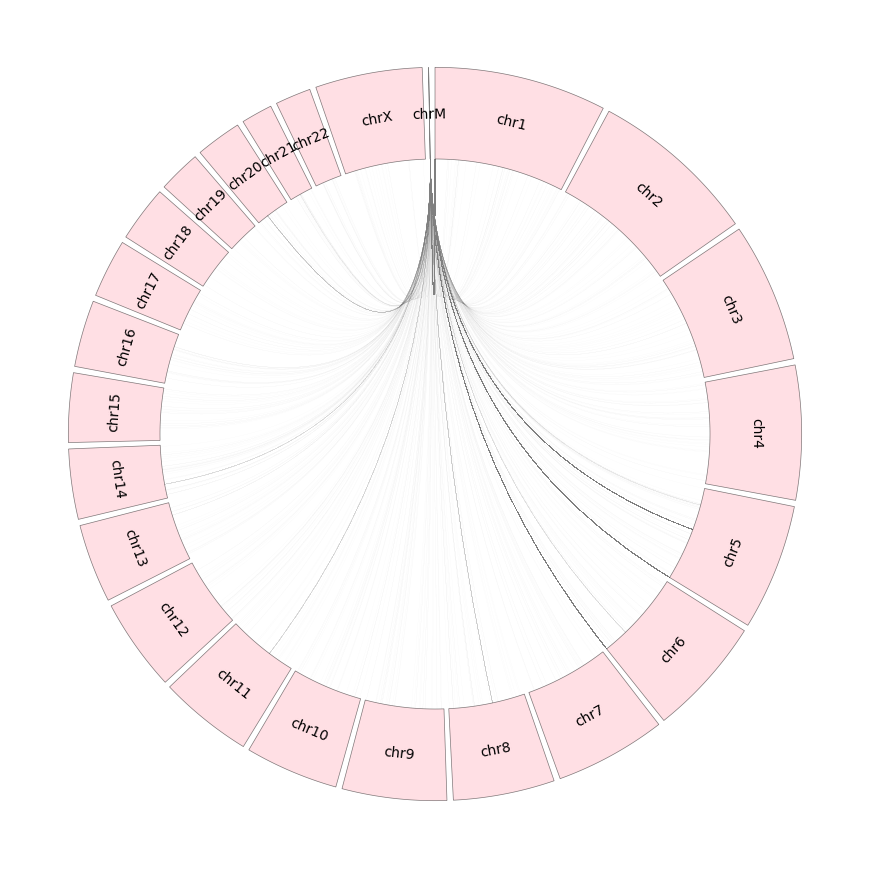

In [25]:


# Initialize circos sectors
sectors = chrlist
circos = Circos(sectors, space=1, start=0, end=360) # Set start-end degree ranges

for sector in circos.sectors:
    # Plot sector axis & name text
    #sector.axis(fc="none", ls="dashdot", lw=2, ec="black", alpha=0.5)
    track1 = sector.add_track((75, 100))
    track1.axis(fc="pink", alpha=0.5)
    track1.text(f"{sector.name}")
    
    #sector.text(f"{sector.name}", size=15)
# Plot links
for index, row in Mappingfile.iterrows():
    mapping = row.values
    # print(mapping) 
    circos.link(mapping[0], mapping[1],alpha = 0.05)


fig = circos.plotfig()

In [68]:
total_length = sum(chrlist.values())
print(total_length)
sectors = {}
for chromo, length in chrlist.items():
    
    if chromo != "chrM":
        sectors[chromo] = chrlist["chrM"]/total_length*chrlist[chromo]
    else:
        sectors[chromo] = chrlist['chrM']

sectors
New_mapping = []
for index, row in Mappingfile.iterrows():
    mapping = row.values
    m = []
    for chromo, start, end in mapping:
        if chromo == "chrM":
            m.append((chromo,start, end))
        else:
            factor = chrlist["chrM"]/total_length*chrlist[chromo]
            # print(chromo, factor)
            m.append((chromo, start/chrlist[chromo]*factor, end/chrlist[chromo]*factor))
    New_mapping.append(m)
    
    # print(mapping) 


3054832041


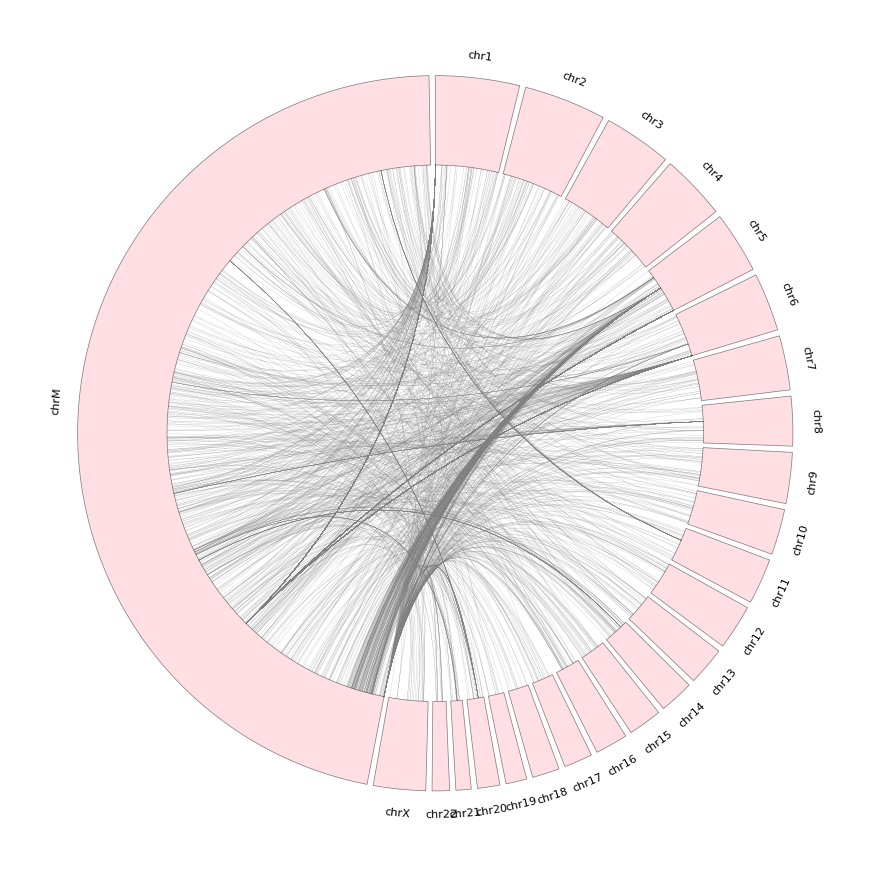

In [69]:
# Initialize circos sectors

circos = Circos(sectors, space=1, start=0, end=360) # Set start-end degree ranges

for sector in circos.sectors:
    # Plot sector axis & name text
    #sector.axis(fc="none", ls="dashdot", lw=2, ec="black", alpha=0.5)
    track1 = sector.add_track((75, 100))
    track1.axis(fc="pink", alpha=0.5)
    #track1.text(f"{sector.name}")
    
    sector.text(f"{sector.name}", size=8)
# Plot links
for mapping in New_mapping:
    circos.link(mapping[0], mapping[1],alpha = 0.5)
fig = circos.plotfig()